In [51]:
import os 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.formula.api as smf

from plotnine import *
%matplotlib inline

In [52]:
path= '/Users/tuesti/Downloads/Athletes.csv'
df=pd.read_csv(path)
df.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
0,1,Mike Tyson,USA,1,NaN,boxing,1990,28.6
1,2,Buster Douglas,USA,2,NaN,boxing,1990,26.0
2,3,Sugar Ray Leonard,USA,3,NaN,boxing,1990,13.0
3,4,Ayrton Senna,Brazil,4,NaN,auto racing,1990,10.0
4,5,Alain Prost,France,5,NaN,auto racing,1990,9.0


In [53]:
# lets try to group together the sports for more simplicity
# like adding all racing and Nascar sports together all motor racing 

df=df.replace('auto racing','motor racing')
df=df.replace('auto Racing','motor racing')
df=df.replace('auto Racing (Nascar)','motor racing')
df=df.replace('F1 Motorsports','motor racing')
df=df.replace('F1 racing','motor racing')
df=df.replace('motorcycle gp','motor racing')
df=df.replace('NADSCAR','motor racing')
df.loc[df['Sport']=='motor racing'].head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
3,4,Ayrton Senna,Brazil,4,NaN,motor racing,1990,10.0
4,5,Alain Prost,France,5,NaN,motor racing,1990,9.0
14,15,Ayrton Senna,Brazil,5,4,motor racing,1991,13.0
15,16,Alain Prost,France,6,5,motor racing,1991,11.0
18,19,Nigel Mansell,UK,9,12,motor racing,1991,9.0


In [54]:
df=df.replace('motor racing','Motor Racing')
df.loc[df['Sport']=='Motor Racing'].head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
3,4,Ayrton Senna,Brazil,4,NaN,Motor Racing,1990,10.0
4,5,Alain Prost,France,5,NaN,Motor Racing,1990,9.0
14,15,Ayrton Senna,Brazil,5,4,Motor Racing,1991,13.0
15,16,Alain Prost,France,6,5,Motor Racing,1991,11.0
18,19,Nigel Mansell,UK,9,12,Motor Racing,1991,9.0


In [55]:
# oks we did motor racing now lets simplify the rest 
df=df.replace('baseball','Baseball')
df=df.replace('basketball','Basketball')
df=df.replace('NBA','Basketball')
df=df.replace('NFL','American Football')
df=df.replace('boxing','Boxing')
df=df.replace('golf','Golf')
df=df.replace('soccer','Soccer')
df=df.replace('tennis','Tennis')
df=df.replace('MMA','Other')
df=df.replace('Hockey','Other')
df=df.replace('ice hockey','Other')
df=df.replace('Ice Hockey','Other')
df=df.replace('cycling','Other')
df.loc[df['Sport']=='Other']

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,earnings ($ million)
45,46,Wayne Gretzky,Canada,5,22,Other,1994,13.5
59,60,Wayne Gretzky,Canada,10,5,Other,1995,14.5
78,79,Joe Sakic,Canada,9,none,Other,1997,17.9
82,83,Sergei Federov,Russia,3,NaN,Other,1998,29.8
149,150,Lance Armstrong,USA,9,>10,Other,2005,28.0
274,275,Conor McGregor,Ireland,4,24,Other,2018,99.0


In [59]:
df.rename(columns={'earnings ($ million)':'Earnings'}, inplace=True)

In [65]:
import matplotlib as mpl
import datetime as dt    

<AxesSubplot:>

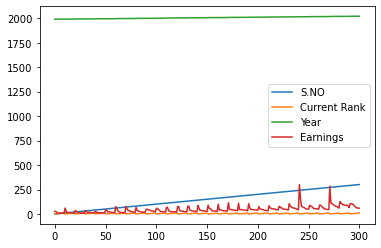

In [67]:
df.plot()

<AxesSubplot:>

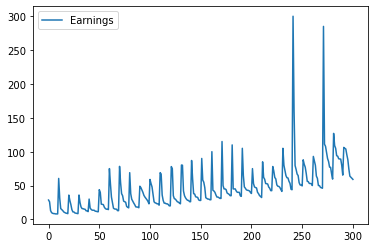

In [68]:
df.plot(y='Earnings')

FIRSTLY. we can see the huge spike in earnings but wtf are the axises

<AxesSubplot:xlabel='Current Rank', ylabel='Earnings'>

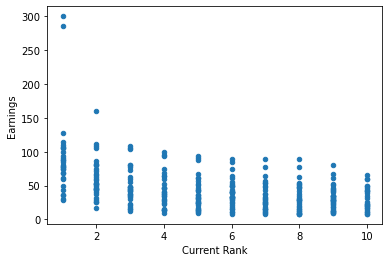

In [70]:
df.plot.scatter('Current Rank', 'Earnings')

ok so this graph is kind of informative
- the first place current rank are slightly higher than those of lower ranks 
- but one of these pts could be #1 with 10 in the 90s but there could also be a #8 rank in 2020 with 12 
- could be more descriptive obvi

<AxesSubplot:ylabel='Frequency'>

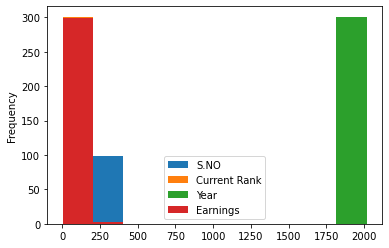

In [71]:
df.plot(kind='hist')

an interesting graph could be a histogram illustrating how many athletes from each sport appear in the Forbes list 

#### oks I'm gonna try a plot line type thingy that illustrates how the earnings of the Current Ranked #1 Changes every year

In [87]:
NumberUnoAth=df.loc[df['Current Rank']==1]
NumberUnoAth.head()

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,Earnings
0,1,Mike Tyson,USA,1,NaN,Boxing,1990,28.6
10,11,Evander Holyfield,USA,1,8,Boxing,1991,60.5
20,21,Michael Jordan,USA,1,3,Basketball,1992,35.9
30,31,Michael Jordan,USA,1,1,Basketball,1993,36.0
40,41,Michael Jordan,USA,1,1,Basketball,1994,30.0


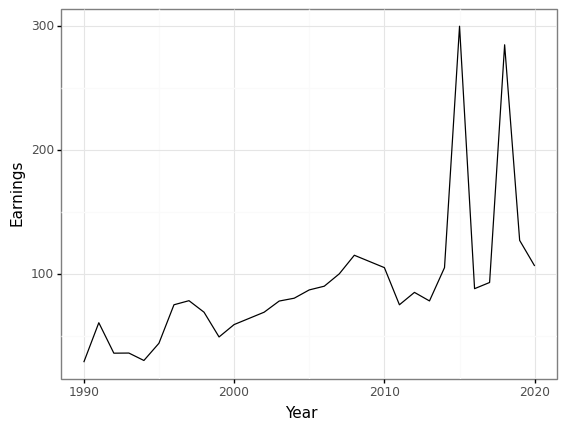

<ggplot: (8773005287593)>

In [88]:
(ggplot(data=NumberUnoAth, mapping=aes(x='Year', y='Earnings'))+
 geom_line()+theme_bw())

- maybe we could try and add multiple lines to see how new and old athletes appear and disapper on the Forbes List 
- maybe cummalative earnings and each line is a different color for a different sport 

In [98]:
dfBasket=df.loc[df['Sport']=='Basketball']
Basket2017=dfBasket.loc[df['Year']==2017]
Basket2017

,S.NO,Name,Nationality,Current Rank,Previous Year Rank,Sport,Year,Earnings
262,263,LeBron James,USA,2,3,Basketball,2017,86.2
265,266,Kevin Durant,USA,5,5,Basketball,2017,60.6
268,269,Stephen Curry,USA,8,NaN,Basketball,2017,47.3
269,270,James Harden,USA,9,NaN,Basketball,2017,46.6


In [110]:
df2017=df.loc[df['Year']==2017]

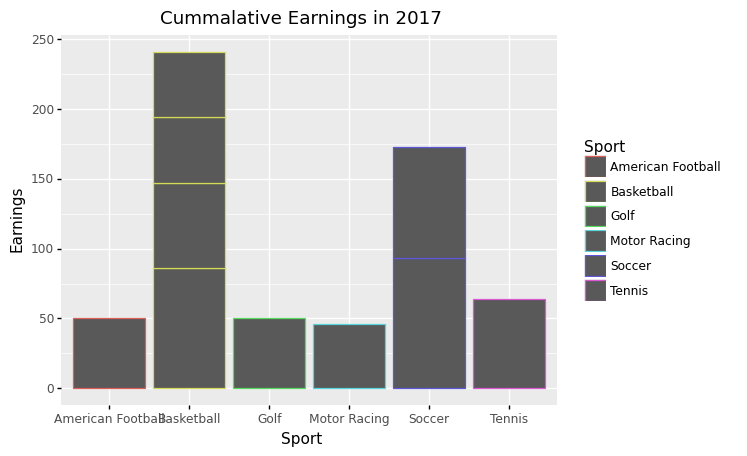

<ggplot: (8773007396654)>

In [151]:
#geom bar?
(ggplot(data=df2017, mapping=aes(x='Sport', y='Earnings',color='Sport'))+
geom_bar(stat='identity')+
ggtitle('Cummalative Earnings in 2017'))

In [152]:
ranges=df.agg(["min", "max"])

ylims= tuple(ranges['Earnings'])

In [153]:
# let's make a function that illustrates the cummalative earnings of 
# each sport for each year 

def sportearningsumyearly( year, 
              ylims=ylims):
    dfplot=df.loc[df['Year']==year]
    
    p=(ggplot(data=dfplot, mapping=aes(x='Sport', y='Earnings', color='Sport'))+
geom_bar(stat='identity')+
ggtitle(f"Cumulative Earnings in year {str(year)}") +
    
    theme_bw()
    
    )
    
    return (p)
    
    


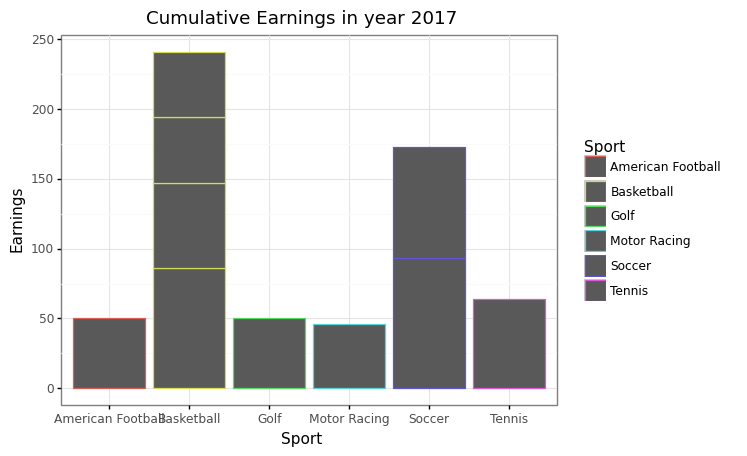

<ggplot: (8773007805684)>

In [154]:
sportearningsumyearly(year=2017)

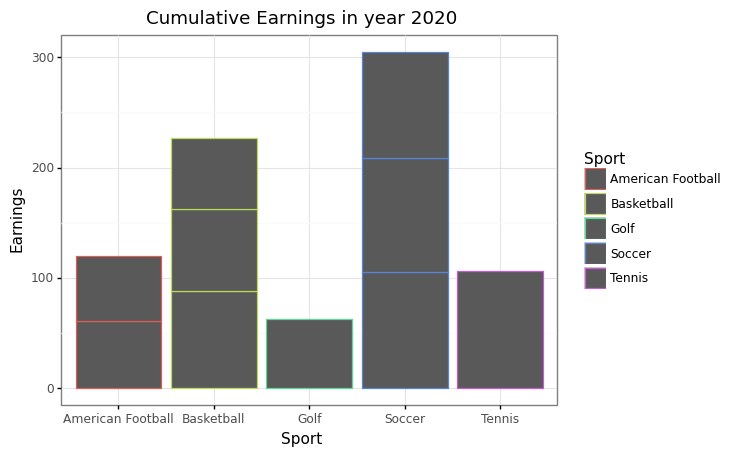

<ggplot: (8773007227362)>

In [155]:
sportearningsumyearly(year=2020)

In [156]:
years=df['Year'].unique().tolist()

In [175]:
for k in years:
    sportearningsumyearly(year=k).save(f"anigapminder{str(k)}.png")

/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: anigapminder1990.png
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: anigapminder1991.png
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: anigapminder1992.png
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x 4.8 in image.
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:722: PlotnineWarning: Filename: anigapminder1993.png
/opt/anaconda3/lib/python3.8/site-packages/plotnine/ggplot.py:719: PlotnineWarning: Saving 6.4 x

In [176]:
import imageio as io
import os

In [177]:
file_names = sorted((fn for fn in os.listdir('.') if fn.startswith('anigapminder')))
file_names

['anigapminder1990.png',
 'anigapminder1991.png',
 'anigapminder1992.png',
 'anigapminder1993.png',
 'anigapminder1994.png',
 'anigapminder1995.png',
 'anigapminder1996.png',
 'anigapminder1997.png',
 'anigapminder1998.png',
 'anigapminder1999.png',
 'anigapminder2000.png',
 'anigapminder2002.png',
 'anigapminder2003.png',
 'anigapminder2004.png',
 'anigapminder2005.png',
 'anigapminder2006.png',
 'anigapminder2007.png',
 'anigapminder2008.png',
 'anigapminder2009.png',
 'anigapminder2010.png',
 'anigapminder2011.png',
 'anigapminder2012.png',
 'anigapminder2013.png',
 'anigapminder2014.png',
 'anigapminder2015.png',
 'anigapminder2016.png',
 'anigapminder2017.png',
 'anigapminder2018.png',
 'anigapminder2019.png',
 'anigapminder2020.png']

In [178]:
with io.get_writer('gapminder.gif', mode='I', duration=0.5) as writer:
    for filename in file_names:
        image = io.imread(filename)
        writer.append_data(image)
writer.close()

In [ ]:
def plotmaker( year, 
              ylims=ylims,
              xlims=xlims, 
              size_lims=size_lims):
    dfplot=gapminder.loc[gapminder['year']==year]


    p=(ggplot(data=dfplot, mapping=aes(x='gdpPercap', y='lifeExp',
                                 color='continent',size='pop')) +
       #the dots
            geom_point(alpha = 0.5)+
       
       #we make sure that all of our axes and dots stay within the limits we set
    scale_size(range = [0.1, 30], limits = size_lims)+
       scale_x_log10(limits = xlims, minor_breaks = [])+
       scale_y_continuous(limits = ylims)+
     
       #The theme
     theme_bw()+
       
       #The text!
    geom_text(aes(x='gdpPercap', y='lifeExp', label='country'),
             color='black', size=12,
             data=dfplot.loc[(dfplot['country']=='Nigeria')|
                            (dfplot['country']=='United States')|
                            (dfplot['pop']>1e8)
                            ]   
             )+
       
       #The title
     ggtitle(f"Gapminder for year {str(year)}")+  
       
       #The x axis!
     xlab('GDP per capita')+
       
       #The y axis!
     ylab('Life Expectancy')

    )
    
    return(p)

In [ ]:
CummulativeSpoEarn=

In [ ]:
ranges=gapminder.agg(["min", "max"])

ylims= tuple(ranges['lifeExp'])
xlims= tuple(ranges['gdpPercap'])
size_lims = tuple(ranges["pop"])

def plotmaker( year, 
              ylims=ylims,
              xlims=xlims, 
              size_lims=size_lims):
    dfplot=gapminder.loc[gapminder['year']==year]